In [0]:
import xgboost
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
year1 = pd.read_csv('year1.csv',na_values='?')

# year1_d =  year1.drop(columns = ['param21','param27','param37'])
# year1_dn = year1_d.dropna()
X = year1[year1.columns[:-1]]
Y = year1.label

In [0]:
X.head()


,param1,param2,param3,param4,param5,retained_earnings,EBIT,book_value_of_equity,sales,equity,param11,param12,param13,param14,param15,para16,param17,param18,param19,param20,param21,param22,param23,param24,param25,param26,param27,param28,logaritm_total_assets,param30,param31,param32,param33,param34,param35,param36,param37,param38,param39,param40,param41,param42,param43,param44,param45,param46,param47,param48,param49,param50,param51,param52,param53,param54,working_capital,param56,param57,param58,param59,param60,param61,param62,param63,param64
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,1.2479,0.21402,0.119980,0.47706,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,0.25792,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,1.4293,0.24806,0.123040,NaN,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,0.33472,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,1.4283,0.30260,0.189960,NaN,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.11550,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,NaN,0.19832,0.115530,0.18732,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


In [0]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [0]:
#X_Norm = (X - X.mean())/X.std()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [0]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5)

In [0]:
xgb = xgboost.XGBClassifier()

In [0]:
prop = 1-(X_train[Y_train==1].shape[0]/X_train.shape[0])

In [0]:
parameters = {'nthreads': [1],
             'objective': ['binary:logistic'],
              'max_depth':[3,4,5,6],
              'gamma':[0.1],
              'subsample': [0.8], 
              'colsample_bytree' : [0.8],
              'min_child_weight': [1],
             'learning_rate': [0.8, 0.4, 0.3, 0.5,0.6],
              'scale_pos_weight': [prop],
             'n_estimators': [600]} #Números de arboles máx


In [0]:
from sklearn.model_selection import GridSearchCV


In [0]:
fit_params = {'early_stopping_rounds': 10,
             'eval_metric': 'logloss',
             'eval_set': [(X_val, Y_val)]} # Datos de testeo


In [0]:
clf = GridSearchCV(xgb, parameters,
                   cv=3, scoring= 'f1')

In [0]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [0]:
X_train = pd.concat([X_train, X_train[Y_train==1]], ignore_index=True)
Y_train = pd.concat([Y_train, Y_train[Y_train==1]], ignore_index=True)
clf.fit(X_train, Y_train, None, **fit_params)

[0]	validation_0-logloss:0.277207
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.158737
[2]	validation_0-logloss:0.125363
[3]	validation_0-logloss:0.111341
[4]	validation_0-logloss:0.10197
[5]	validation_0-logloss:0.090391
[6]	validation_0-logloss:0.093295
[7]	validation_0-logloss:0.092
[8]	validation_0-logloss:0.090857
[9]	validation_0-logloss:0.091688
[10]	validation_0-logloss:0.092882
[11]	validation_0-logloss:0.087112
[12]	validation_0-logloss:0.089297
[13]	validation_0-logloss:0.089289
[14]	validation_0-logloss:0.089618
[15]	validation_0-logloss:0.090786
[16]	validation_0-logloss:0.091091
[17]	validation_0-logloss:0.089628
[18]	validation_0-logloss:0.094044
[19]	validation_0-logloss:0.094062
[20]	validation_0-logloss:0.095462
[21]	validation_0-logloss:0.094354
Stopping. Best iteration:
[11]	validation_0-logloss:0.087112

[0]	validation_0-logloss:0.273008
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validati

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0.1],
                         'learning_rate': [0.8, 0.4, 0.3, 0.5, 0.6],
                         'max_depth': [3, 4, 5, 6], 'min_child_weight': [1],
                         'n_estimators': [600], 'nthreads': [1],
                         'objective': 

In [0]:
clf.best_estimator_ #nos da la mejor cobinacio¡ón de parámetros.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, nthreads=1, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=0.9603497356649044, seed=None, silent=None,
              subsample=0.8, verbosity=1)

In [0]:
clf.best_score_ #nos da el mejor resultado

0.9544105257636468

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [0]:
best_xgb = clf.best_estimator_

In [0]:
y_preds = best_xgb.predict(X_test)

In [0]:
acc = accuracy_score(Y_test, y_preds )

In [0]:
acc

0.9876777251184834

In [0]:
y_preds = best_xgb.predict(X_test[Y_test==0])
acc = accuracy_score(Y_test[Y_test==0], y_preds )
print(acc)
y_preds = best_xgb.predict(X_test[Y_test==1])
acc = accuracy_score(Y_test[Y_test==1], y_preds )
print(acc)

1.0
0.6486486486486487


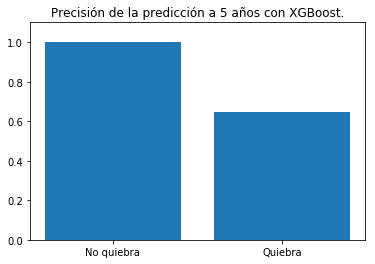

In [1]:
import matplotlib.pyplot as plt
import numpy as np
prec = [1, 0.6486486486486487]
plt.bar(np.arange(2), prec, tick_label=['No quiebra', 'Quiebra'])
plt.title("Precisión de la predicción a 5 años con XGBoost.")
axes = plt.gca()
axes.set_ylim([0, 1.1])
plt.show()

In [0]:
y_preds = best_xgb.predict(X_test)
m = confusion_matrix(Y_test.values, y_preds)
print(m)

[[1018    0]
 [  13   24]]


In [0]:
from sklearn.metrics import f1_score, recall_score
f1 = f1_score(Y_test.values, y_preds)
recall = recall_score(Y_test.values, y_preds)
print("F1: ", f1)
print("recall: ", recall)

F1:  0.7868852459016393
recall:  0.6486486486486487


In [0]:
print(Y_test[Y_test==0].shape)
print(Y_test[Y_test==1].shape)


(1018,)
(37,)


In [0]:
print(Y_train[Y_train==0].shape)
print(Y_train[Y_train==1].shape)

(4723,)
(390,)


In [0]:
print(Y_val[Y_val==0].shape)
print(Y_val[Y_val==1].shape)

(1015,)
(39,)
